# Intrusion mutliclass classification in IDS using Network Traffic Classification based on Single Flow Time Series Analysis 

Problem:  mutliclass classification of Intrusion in IDS system

Raw data from: UNSW-NB15 [1]

-----------------------------------------------------------------------
[1] Nour Moustafa and Jill Slay. Unsw-nb15: a comprehensive data set for network intrusion detection systems (unsw-nb15 network data set). In 2015 military communications and information systems conference (MilCIS), pages 1–6. IEEE, 2015.

In [1]:
import pandas as pd
import numpy as np
import json
import collections

import warnings
warnings.filterwarnings('ignore')

from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

import seaborn as sns

#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
import lightgbm as lgb
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

from sklearn.model_selection import train_test_split

from xgboost import XGBClassifier


from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from collections import Counter
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler, NearMiss

from sklearn.utils import class_weight
from imblearn.over_sampling import SMOTE



In [2]:
df = pd.read_csv("../cnsm_final_datasets/ids_unsw_nb_15_multiclass.csv")

In [3]:
df

,Unnamed: 0,DST_IP,SRC_IP,PACKETS,PACKETS_REV,BYTES,BYTES_REV,TIME_FIRST,TIME_LAST,DST_PORT,...,SPECTRAL_SKEWNESS,SPECTRAL_ROLLOFF,SPECTRAL_CENTROID,SPECTRAL_SPREAD,SPECTRAL_SLOPE,SPECTRAL_CREST,SPECTRAL_FLUX,SPECTRAL_BANDWIDTH,PERIODICITY_SCDF,LABEL
0,0,149.171.126.18,175.45.176.1,10,0,40,0,1.424220e+09,1.424220e+09,179,...,-316303.733903,0.025341,0.465500,0.329833,NaN,-142.570453,382.427060,-0.000199,0.028264,Clear
1,1,175.45.176.1,149.171.126.18,6,0,0,0,1.424220e+09,1.424220e+09,26581,...,NaN,0.006667,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,Clear
2,2,149.171.126.12,175.45.176.2,12,0,746,0,1.424220e+09,1.424220e+09,445,...,6629.691442,0.857953,0.531418,0.291302,0.079684,1.335840,0.163986,0.993135,0.257254,Fuzzers
3,3,175.45.176.2,149.171.126.12,8,0,370,0,1.424220e+09,1.424220e+09,1540,...,4637.314944,0.568099,0.520225,0.288753,0.051809,1.165001,0.163854,0.993135,0.361351,Fuzzers
4,4,149.171.126.12,175.45.176.2,12,0,588,0,1.424220e+09,1.424220e+09,445,...,2903.826062,0.679153,0.541261,0.288383,0.116073,1.248354,0.371784,0.911681,0.080400,Fuzzers
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2979454,2979454,149.171.126.15,175.45.176.2,4,4,2360,584,1.421934e+09,1.421934e+09,2049,...,-320173.252379,0.014216,0.425575,0.384493,NaN,-316.101688,196.224287,-0.000199,0.054011,Clear
2979455,2979455,149.171.126.11,175.45.176.2,112,0,5600,0,1.421934e+09,1.421934e+09,137,...,103147.938616,0.006667,0.009826,0.007384,-2.461098,428.683046,457032.737889,-0.599179,0.000002,Fuzzers
2979456,2979456,149.171.126.11,175.45.176.2,112,0,5600,0,1.421934e+09,1.421934e+09,137,...,103147.938616,0.006667,0.009826,0.007384,-2.461098,428.683046,457032.737889,-0.599179,0.000002,Fuzzers
2979457,2979457,149.171.126.11,175.45.176.2,112,0,5600,0,1.421934e+09,1.421934e+09,137,...,103147.938616,0.006667,0.009826,0.007384,-2.461098,428.683046,457032.737889,-0.599179,0.000002,Fuzzers


In [4]:
default_faetures = [
    "PACKETS",
    "PACKETS_REV",
    "BYTES",
    "BYTES_REV",
]

statistics_features = [
    "MEAN",
    "MEDIAN",
    "STDEV",
    "VAR",
    "BURSTINESS",
    "Q1",
    "Q3",
    "MIN",
    "MAX",
    "MIN_MINUS_MAX",
    "MODE",
    "COEFFICIENT_OF_VARIATION",
    "AVERAGE_DISPERSION",
    "PERCENT_DEVIATION",
    "ROOT_MEAN_SQUARE",
    "PERCENT_BELOW_MEAN",
    "PERCENT_ABOVE_MEAN",
    "PEARSON_SK1_SKEWNESS",
    "PEARSON_SK2_SKEWNESS",
    "FISHER_MI_3_SKEWNESS",
    "FISHER_PEARSON_g1_SKEWNESS",
    "FISHER_PEARSON_G1_SKEWNESS",
    "GALTON_SKEWNESS",
    "KURTOSIS",
    "ENTROPY",
    "SCALED_ENTROPY",
]
distribution_features = [
    "HURST_EXPONENT",
    "BENFORD_LAW_PRESENTED",
    "P_BENFORD",
    "NORMAL_DISTRIBUTION",
    "CNT_DISTRIBUTION",
    "TIME_DISTRIBUTION",
    "AREA_VALUES_DISTRIBUTION",
]
time_features = [
    "MEAN_SCALED_TIME",
    "MEDIAN_SCALED_TIME",
    "Q1_SCALED_TIME",
    "Q3_SCALED_TIME",
    "DURATION",
    "MEAN_DIFFTIMES",
    "MEDIAN_DIFFTIMES",
    "MIN_DIFFTIMES",
    "MAX_DIFFTIMES",
    "MEAN_SCALED_DIFFTIMES",
    ]
behavior_features = [
    "SIG_SPACES",
    "SWITCHING_METRIC",
    "DIRECTIONS",
    "TRANSIENTS",
    "CNT_ZEROS",
    "CNT_NZ_DISTRIBUTION",
    "BIGGEST_CNT_1_SEC",
    "PERIODICITY",
    "VAL",
    "TIME",
]
frequency_features = [
    "MIN_POWER",
    "MAX_POWER",
    "MIN_POWER_FREQ",
    "MAX_POWER_FREQ",
    "SPECTRAL_ENERGY",
    "SPECTRAL_ENTROPY",
    "SPECTRAL_KURTOSIS",
    "SPECTRAL_SKEWNESS",
    "SPECTRAL_ROLLOFF",
    "SPECTRAL_CENTROID",
    "SPECTRAL_SPREAD",
    "SPECTRAL_SLOPE",
    "SPECTRAL_CREST",
    "SPECTRAL_FLUX",
    "SPECTRAL_BANDWIDTH",
    "PERIODICITY_SCDF",
]

features = [
    "PACKETS",
    "PACKETS_REV",
    "BYTES",
    "BYTES_REV",
    "MEAN",
    "MEDIAN",
    "STDEV",
    "VAR",
    "BURSTINESS",
    "Q1",
    "Q3",
    "MIN",
    "MAX",
    "MIN_MINUS_MAX",
    "MODE",
    "COEFFICIENT_OF_VARIATION",
    "AVERAGE_DISPERSION",
    "PERCENT_DEVIATION",
    "ROOT_MEAN_SQUARE",
    "PERCENT_BELOW_MEAN",
    "PERCENT_ABOVE_MEAN",
    "PEARSON_SK1_SKEWNESS",
    "PEARSON_SK2_SKEWNESS",
    "FISHER_MI_3_SKEWNESS",
    "FISHER_PEARSON_g1_SKEWNESS",
    "FISHER_PEARSON_G1_SKEWNESS",
    "GALTON_SKEWNESS",
    "KURTOSIS",
    "ENTROPY",
    "SCALED_ENTROPY",
    "HURST_EXPONENT",
    "BENFORD_LAW_PRESENTED",
    "P_BENFORD",
    "NORMAL_DISTRIBUTION",
    "CNT_DISTRIBUTION",
    "TIME_DISTRIBUTION",
    "AREA_VALUES_DISTRIBUTION",
    "MEAN_SCALED_TIME",
    "MEDIAN_SCALED_TIME",
    "Q1_SCALED_TIME",
    "Q3_SCALED_TIME",
    "DURATION",
    "MEAN_DIFFTIMES",
    "MEDIAN_DIFFTIMES",
    "MIN_DIFFTIMES",
    "MAX_DIFFTIMES",
    "MEAN_SCALED_DIFFTIMES",
    "SIG_SPACES",
    "SWITCHING_METRIC",
    "DIRECTIONS",
    "TRANSIENTS",
    "CNT_ZEROS",
    "CNT_NZ_DISTRIBUTION",
    "BIGGEST_CNT_1_SEC",
    "PERIODICITY",
    "VAL",
    "TIME",
    "MIN_POWER",
    "MAX_POWER",
    "MIN_POWER_FREQ",
    "MAX_POWER_FREQ",
    "SPECTRAL_ENERGY",
    "SPECTRAL_ENTROPY",
    "SPECTRAL_KURTOSIS",
    "SPECTRAL_SKEWNESS",
    "SPECTRAL_ROLLOFF",
    "SPECTRAL_CENTROID",
    "SPECTRAL_SPREAD",
    "SPECTRAL_SLOPE",
    "SPECTRAL_CREST",
    "SPECTRAL_FLUX",
    "SPECTRAL_BANDWIDTH",
    "PERIODICITY_SCDF",
]

In [5]:
import sklearn
pd.set_option('display.max_columns', None)


def handle_df(df):
    df['LABEL'] = df.LABEL.astype('category')
    df["LABEL_code"] = df["LABEL"].cat.codes

    bool_features = ["TRANSIENTS", "BENFORD_LAW_PRESENTED", "SIG_SPACES", "PERIODICITY","PERIODICITY_SCDF"]


    for F in features:
        if F in bool_features:
            continue
        # if F in distribution_features:
        #     df.replace([np.inf], 0.5, inplace=True)
        #     df.replace([-np.inf], 0.5, inplace=True)
        #     df.loc[df[F].isnull(), F] = 0.5
        # elif F in ["DIRECTIONS","NORMAL_DISTRIBUTION"]: 
        #     df.replace([np.inf], 0.5, inplace=True)
        #     df.replace([-np.inf], 0.5, inplace=True)
        #     df.loc[df[F].isnull(), F] = 0.5
        # elif F in frequency_features: 
        #     df.replace([np.inf], -1, inplace=True)
        #     df.replace([-np.inf], -1, inplace=True)
        #     df.loc[df[F].isnull(), F] = -1
        # else:
        #     df.replace([np.inf], 0, inplace=True)
        #     df.replace([-np.inf], 0, inplace=True)
        #     df.loc[df[F].isnull(), F] = 0


    for F in bool_features:
        df.loc[df[F].isnull(), F] = False
        df[F] = df[F].astype('bool')
    
    return df

df = handle_df(df)

In [6]:
df

,Unnamed: 0,DST_IP,SRC_IP,PACKETS,PACKETS_REV,BYTES,BYTES_REV,TIME_FIRST,TIME_LAST,DST_PORT,SRC_PORT,MEAN,MEDIAN,STDEV,VAR,BURSTINESS,Q1,Q3,MIN,MAX,MIN_MINUS_MAX,MODE,COEFFICIENT_OF_VARIATION,AVERAGE_DISPERSION,PERCENT_DEVIATION,ROOT_MEAN_SQUARE,PERCENT_BELOW_MEAN,PERCENT_ABOVE_MEAN,PEARSON_SK1_SKEWNESS,PEARSON_SK2_SKEWNESS,FISHER_MI_3_SKEWNESS,FISHER_PEARSON_g1_SKEWNESS,FISHER_PEARSON_G1_SKEWNESS,GALTON_SKEWNESS,KURTOSIS,ENTROPY,SCALED_ENTROPY,HURST_EXPONENT,BENFORD_LAW_PRESENTED,P_BENFORD,NORMAL_DISTRIBUTION,CNT_DISTRIBUTION,TIME_DISTRIBUTION,AREA_VALUES_DISTRIBUTION,MEAN_SCALED_TIME,MEDIAN_SCALED_TIME,Q1_SCALED_TIME,Q3_SCALED_TIME,DURATION,MEAN_DIFFTIMES,MEDIAN_DIFFTIMES,MIN_DIFFTIMES,MAX_DIFFTIMES,MEAN_SCALED_DIFFTIMES,SIG_SPACES,SWITCHING_METRIC,TRANSIENTS,CNT_ZEROS,CNT_NZ_DISTRIBUTION,BIGGEST_CNT_1_SEC,DIRECTIONS,PERIODICITY,VAL,TIME,MIN_POWER,MAX_POWER,MIN_POWER_FREQ,MAX_POWER_FREQ,POWER_MEAN,POWER_STD,POWER_MODE,SPECTRAL_ENERGY,SPECTRAL_ENTROPY,SPECTRAL_KURTOSIS,SPECTRAL_SKEWNESS,SPECTRAL_ROLLOFF,SPECTRAL_CENTROID,SPECTRAL_SPREAD,SPECTRAL_SLOPE,SPECTRAL_CREST,SPECTRAL_FLUX,SPECTRAL_BANDWIDTH,PERIODICITY_SCDF,LABEL,LABEL_code
0,0,149.171.126.18,175.45.176.1,10,0,40,0,1.424220e+09,1.424220e+09,179,26581,64,60.0,8.426150,71,-0.767317,60.0,60.00,60,80,20,60,13.165859,6,9.375000,64.498062,0.800000,0.200000,0.474713,15.665518,-0.962798,1.855764e-19,2.200665e-19,0.000000,2.640746,0.721928,0.217322,0.520925,False,0.477121,0.0,0.0,0.581329,0.812500,0.105863,0.110606,0.085446,0.151154,0.182105,0.020234,0.000009,9.536743e-07,0.085438,0.236825,False,0.444444,False,0.0,0.0,640,1.0,False,0,0.000000,-163.305301,28.052888,0.025540,0.025341,-0.196765,2.391191,-0.13590,-9.838254e+02,NaN,2.167659e+07,-316303.733903,0.025341,0.465500,0.329833,NaN,-142.570453,382.427060,-0.000199,True,Clear,2
1,1,175.45.176.1,149.171.126.18,6,0,0,0,1.424220e+09,1.424220e+09,26581,179,60,60.0,0.000000,0,-1.000000,60.0,60.00,60,60,0,60,0.000000,0,0.000000,60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,1.000000,False,0.301030,0.0,0.0,0.536769,0.875000,0.084505,0.096086,0.000007,0.157423,0.157432,0.031486,0.000009,5.960464e-06,0.096073,0.327734,False,0.000000,False,0.0,0.0,360,1.0,True,60,0.000007,NaN,NaN,NaN,NaN,NaN,NaN,0.00000,NaN,NaN,NaN,NaN,0.006667,NaN,NaN,NaN,NaN,NaN,0.000000,False,Clear,2
2,2,149.171.126.12,175.45.176.2,12,0,746,0,1.424220e+09,1.424220e+09,445,1540,122,60.0,96.555683,9323,-0.116420,60.0,197.00,60,296,236,60,79.144003,82,67.213115,153.201936,0.666667,0.333333,0.642117,3.169156,0.569383,1.851464e-07,2.127170e-07,0.094891,1.931664,1.251629,0.349133,0.638009,False,0.592635,0.0,0.0,0.593576,0.750000,0.427693,0.551941,0.267584,0.666187,0.720536,0.065503,0.000011,9.536743e-07,0.267580,0.244799,False,0.545455,False,0.0,0.0,1466,1.0,False,0,0.000000,0.330470,0.494456,0.006667,0.999801,0.370146,0.040775,0.33047,1.850730e+03,2.638120e+03,1.884500e+04,6629.691442,0.857953,0.531418,0.291302,0.079684,1.335840,0.163986,0.993135,True,Fuzzers,5
3,3,175.45.176.2,149.171.126.12,8,0,370,0,1.424220e+09,1.424220e+09,1540,445,106,60.0,85.632938,7334,-0.106282,60.0,106.25,60,245,185,60,80.785790,69,65.094340,133.064834,0.750000,0.250000,0.537176,3.012859,0.502625,3.981232e-07,4.965469e-07,-0.989189,1.797994,0.811278,0.270426,0.463169,False,0.477121,0.0,0.0,0.560795,0.791667,0.385295,0.528398,0.325725,0.687046,0.687051,0.098150,0.000007,2.145767e-06,0.325723,0.301330,False,0.571429,False,0.0,0.0,850,1.0,False,0,0.000000,0.605359,0.769212,0.006667,0.999801,0.660268,0.041418,0.60536,3.301338e+03,1.967891e+03,1.400714e+04,4637.314944,0.568099,0.520225,0.288753,0.051809,1.165001,0.163854,0.993135,True,Fuzzers,5
4,4,149.171.126.12,175.45.176.2,12,0,588,0,1.424220e+09,1.424220e+09,445,1793,109,60.0,72.622311,5274,-0.200293,60.0,197.00,60,217,157,60,66.625973,65,59.633028,129.291660,0.666667,0.333333,0.674724,3.676556,0.265408,4.637886e-21,5.328525e-21,0.284672,1.312703,1.251629,0.349133,0.668388,Fa

In [7]:
df[["LABEL", "LABEL_code"]].drop_duplicates().sort_values("LABEL_code")

,LABEL,LABEL_code
183350,Analysis,0
4080,Backdoor,1
0,Clear,2
220,DoS,3
109,Exploits,4
2,Fuzzers,5
110,Generic,6
219,Reconnaissance,7
210,Shellcode,8
214,Worms,9


In [8]:
classifications_array = []
for index, row in df[["LABEL", "LABEL_code"]].drop_duplicates().sort_values("LABEL_code").iterrows():
    classifications_array.append(row[0])
classifications_array

['Analysis',
 'Backdoor',
 'Clear',
 'DoS',
 'Exploits',
 'Fuzzers',
 'Generic',
 'Reconnaissance',
 'Shellcode',
 'Worms']

In [9]:
df = df[["LABEL_code"] + features].copy()

In [10]:
def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    return df[indices_to_keep].astype(np.float64)

df = clean_dataset(df)

In [11]:
df.shape

(864770, 74)

In [12]:
df_validation = df.sample(n = 100000)
df_features =  df[~df.isin(df_validation)].dropna()

In [13]:
def get_confusion_matrix(y_test, y_pred):
    # Get and reshape confusion matrix data
    matrix = confusion_matrix(y_test, y_pred)
    percentage_matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]
    return matrix, percentage_matrix

def plot_confusion_matrix(matrix, percentage_matrix, model=""):
    # Build the plot
    fig, ax = plt.subplots(1, 2,figsize=(15,5))
    sns.set(font_scale=1.4)
    sns.heatmap(matrix, annot=True, annot_kws={'size':10}, fmt='g',
                cmap=plt.cm.Greens, linewidths=0.2, ax=ax[0])
    sns.heatmap(percentage_matrix, annot=True, annot_kws={'size':10}, fmt='g',
                cmap=plt.cm.Greens, linewidths=0.2, ax=ax[1])
    # Add labels to the plot
    plt.tick_params(axis='both', which='minor', labelsize=5)
    # tick_marks = np.arange(len(classifications_array)) + 0.5
    # plt.xticks(tick_marks, classifications_array, rotation=85)
    # plt.yticks(tick_marks, classifications_array, rotation=0)
    ax[0].set_xlabel('Predicted label')
    ax[0].set_ylabel('True label')
    ax[0].set_title(f'Absolute Confusion Matrix for {model}')
    ax[1].set_xlabel('Predicted label')
    ax[1].set_ylabel('True label')
    ax[1].set_title(f'Relative Confusion Matrix for {model}')
    # pyplot.savefig("ddos_timeseries_plugin_classification.eps", format="eps")
    plt.show()

In [14]:
X = df_features[features]
y = df_features.LABEL_code
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y)

In [15]:
y_train.value_counts()

2.0    489592
4.0     22651
5.0     12244
7.0      3611
6.0      3162
3.0      2948
0.0       447
8.0       355
1.0       237
9.0        92
Name: LABEL_code, dtype: int64

In [16]:
y_test.value_counts()

2.0    209826
4.0      9708
5.0      5247
7.0      1548
6.0      1355
3.0      1264
0.0       191
8.0       152
1.0       101
9.0        39
Name: LABEL_code, dtype: int64

In [17]:
df_validation["LABEL_code"].value_counts()

2.0    91437
4.0     4179
5.0     2334
7.0      665
6.0      603
3.0      555
0.0       93
1.0       63
8.0       52
9.0       19
Name: LABEL_code, dtype: int64

In [18]:
from hyperopt import STATUS_OK, Trials, fmin, hp, tpe
from sklearn.metrics import mean_absolute_error

def tunne_together_XGBoost_classification(df_tunne, _features, verbose=True):
    X=df_tunne[_features]  # Features
    y=df_tunne['LABEL_code']  # Labels
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0, stratify=y)
    
    def objective(space):
        clf = XGBClassifier(
                        n_estimators = int(space['n_estimators']), max_depth = int(space['max_depth']), gamma = space['gamma'],
                        reg_alpha = int(space['reg_alpha']),min_child_weight=int(space['min_child_weight']),
                        colsample_bytree=int(space['colsample_bytree']), 
                        # subsample=int(space['subsample']),
                        # eta=space['eta'],
                            )

        classes_weights = list(class_weight.compute_class_weight('balanced',
                                                    classes=np.unique(y_train),
                                                    y=y_train))

        weights = np.ones(y_train.shape[0], dtype = 'float')
        for i, val in enumerate(y_train):
            weights[i] = classes_weights[int(val-1)]

        evaluation = [( X_train, y_train), ( X_test, y_test)]

        clf.fit(X_train, y_train,
                eval_set=evaluation, eval_metric="auc",
                early_stopping_rounds=10,verbose=False, sample_weight=weights)

        pred = clf.predict(X_test)
        # accuracy = mean_absolute_error(y_test, pred)
        # accuracy = accuracy_score(y_test, pred)
        accuracy = f1_score(y_test, pred,average='macro')
        if verbose is True:
            print ("SCORE:", accuracy, "  ", space)
        return {'loss': -accuracy, 'status': STATUS_OK }
    
    space={'max_depth': hp.quniform("max_depth", 5, 9, 2),
        'gamma': hp.uniform ('gamma', 1,4),
        'reg_alpha' : hp.quniform('reg_alpha', 0,90,1),
        'reg_lambda' : hp.uniform('reg_lambda', 0,1),
        'colsample_bytree' : hp.uniform('colsample_bytree', 0, 1),
        'min_child_weight' : hp.quniform('min_child_weight', 0, 10, 1),
        'n_estimators': hp.quniform('n_estimators', 80, 200, 20),
        # 'subsample': hp.quniform('subsample', 3, 20, 1),
        # 'eta': hp.quniform('eta', 0.005, 0.3, 0.005),
        'seed': 0
    }
    
    trials = Trials()
    
    best_hyperparams = fmin(fn = objective,
                        space = space,
                        algo = tpe.suggest,
                        max_evals = 100,
                        trials = trials)
        
    print("The best hyperparameters are : ","\n")
    print(best_hyperparams)
    return best_hyperparams

In [19]:
df_to_tune = df_features.sample(n=100000)
best_hyperparams = tunne_together_XGBoost_classification(df_to_tune, features, verbose=False)

100%|██████████| 100/100 [25:55<00:00, 15.56s/trial, best loss: -0.3024510864908678]
The best hyperparameters are :  

{'colsample_bytree': 0.17499772587771714, 'gamma': 2.7721988213479696, 'max_depth': 8.0, 'min_child_weight': 4.0, 'n_estimators': 160.0, 'reg_alpha': 6.0, 'reg_lambda': 0.030243125816553022}


In [20]:
def while_XGBoost_classification_tunned_old(best_hyperparams, cycles=100):
    X=df_features[features]  # Features
    y=df_features['LABEL_code']  # Labels
    best = 0
    best_model = None
    report = None
    i = 0
    print(f"\r{i}", end="")
    for i in range(cycles):
        print(f"\r{i}", end="", flush=True)
        tmp_f1 = 0
        tmp_str = ""
        #Split on train and test
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y) # 70% training and 30% test
        # sm = SMOTE(random_state=100)
        # X_train, y_train = sm.fit_resample(X_train, y_train)
        # X_test, y_test = sm.fit_resample(X_test, y_test)
        
        model = XGBClassifier(
            n_estimators = int(best_hyperparams['n_estimators']), max_depth = int(best_hyperparams['max_depth']), gamma = best_hyperparams['gamma'],
            reg_alpha = int(best_hyperparams['reg_alpha']),min_child_weight=int(best_hyperparams['min_child_weight']),
            colsample_bytree=int(best_hyperparams['colsample_bytree']),
            # subsample=int(best_hyperparams['subsample']),
            # eta=best_hyperparams['eta'],
        )
        model.fit(X_train, y_train, ) # eval_set=evaluation, eval_metric=["auc","error","logloss"], verbose=False
        y_pred = model.predict(X_test)
        
        F1 = f1_score(y_test, y_pred, average='micro')
        if F1 > best:   
            best = F1
            best_model = model
            report = classification_report(y_test, y_pred, target_names=classifications_array, digits=4)
        
    print("")
    print(report)
    return best_model

In [21]:
best_model = while_XGBoost_classification_tunned_old(best_hyperparams, cycles=10)

9
                precision    recall  f1-score   support

      Analysis     0.0000    0.0000    0.0000       191
      Backdoor     0.6250    0.1485    0.2400       101
         Clear     0.9770    0.9890    0.9829    209826
           DoS     0.6167    0.0293    0.0559      1264
      Exploits     0.6862    0.8079    0.7421      9708
       Fuzzers     0.6747    0.5039    0.5769      5247
       Generic     0.7463    0.2214    0.3415      1355
Reconnaissance     0.9261    0.7048    0.8004      1548
     Shellcode     0.4286    0.0197    0.0377       152
         Worms     0.5000    0.1026    0.1702        39

      accuracy                         0.9565    229431
     macro avg     0.6181    0.3527    0.3948    229431
  weighted avg     0.9526    0.9565    0.9514    229431



In [22]:
X_validation=df_validation[features]  # Features
y_validation=df_validation['LABEL_code']  # Labels

y_pred = best_model.predict(X_validation)
report = classification_report(y_validation, y_pred, target_names=classifications_array, digits=4)
print(report)

# matrix, percentage_matrix = get_confusion_matrix(y_validation, y_pred)
# plot_confusion_matrix(matrix, percentage_matrix, model="XGBoost")

                precision    recall  f1-score   support

      Analysis     0.0000    0.0000    0.0000        93
      Backdoor     0.8000    0.1270    0.2192        63
         Clear     0.9768    0.9886    0.9827     91437
           DoS     0.7826    0.0324    0.0623       555
      Exploits     0.6878    0.8134    0.7453      4179
       Fuzzers     0.6627    0.5069    0.5744      2334
       Generic     0.7425    0.2056    0.3221       603
Reconnaissance     0.9075    0.7083    0.7956       665
     Shellcode     0.0000    0.0000    0.0000        52
         Worms     0.6667    0.2105    0.3200        19

      accuracy                         0.9560    100000
     macro avg     0.6227    0.3593    0.4022    100000
  weighted avg     0.9528    0.9560    0.9508    100000



In [23]:
import csv

problem = "IDS_UNSW-multiclass"
with open("feature_reduction_results.csv", "a") as f:
    writer = csv.writer(f)
    report = classification_report(y_validation, y_pred, target_names=classifications_array, digits=4)
    tmp = report.split("weighted avg")
    tmp_2 = tmp[0].split("macro avg")
    accuracy = tmp_2[0].split("accuracy")[1].split()[0]
    _ = tmp_2[1].split()
    m_precision = _[0]
    m_recall = _[1]
    m_f1 = _[2]
    _ = tmp[1].split()
    w_precision = _[0]
    w_recall = _[1]
    w_f1 = _[2]
    writer.writerow([problem, "-", accuracy, m_precision, m_recall, m_f1, w_precision, w_recall, w_f1])

# Feature importance

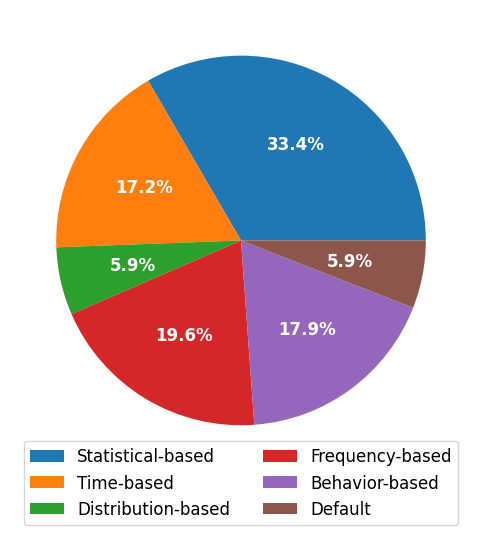

In [24]:
feat_importances = pd.Series(best_model.feature_importances_, index = X_validation.columns).sort_values(ascending = True)

f_sf = feat_importances[statistics_features].sum()
f_tf = feat_importances[time_features].sum()
f_df = feat_importances[distribution_features].sum()
f_ff = feat_importances[frequency_features].sum()
f_bf = feat_importances[behavior_features].sum()
f_df = feat_importances[default_faetures].sum()

fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(aspect="equal"))
data = [f_sf, f_tf, f_df, f_ff, f_bf, f_df]
ingredients = ["Statistical-based", "Time-based", "Distribution-based",  "Frequency-based",  "Behavior-based",  "Default"]
def func(pct, allvals):
    return "{:.1f}%".format(pct)
wedges, texts, autotexts = ax.pie(data, autopct=lambda pct: func(pct, data),
                                  textprops=dict(color="w"))
ax.legend(wedges, ingredients,
          loc="center",
          bbox_to_anchor=(0.5, 0, 0, -0.05),
          prop={'size': 12},
          ncol=2)
plt.setp(autotexts, size=12, weight="bold")
plt.show()

In [25]:
data

[0.26934564, 0.138844, 0.04788288, 0.15826857, 0.14455119, 0.04788288]

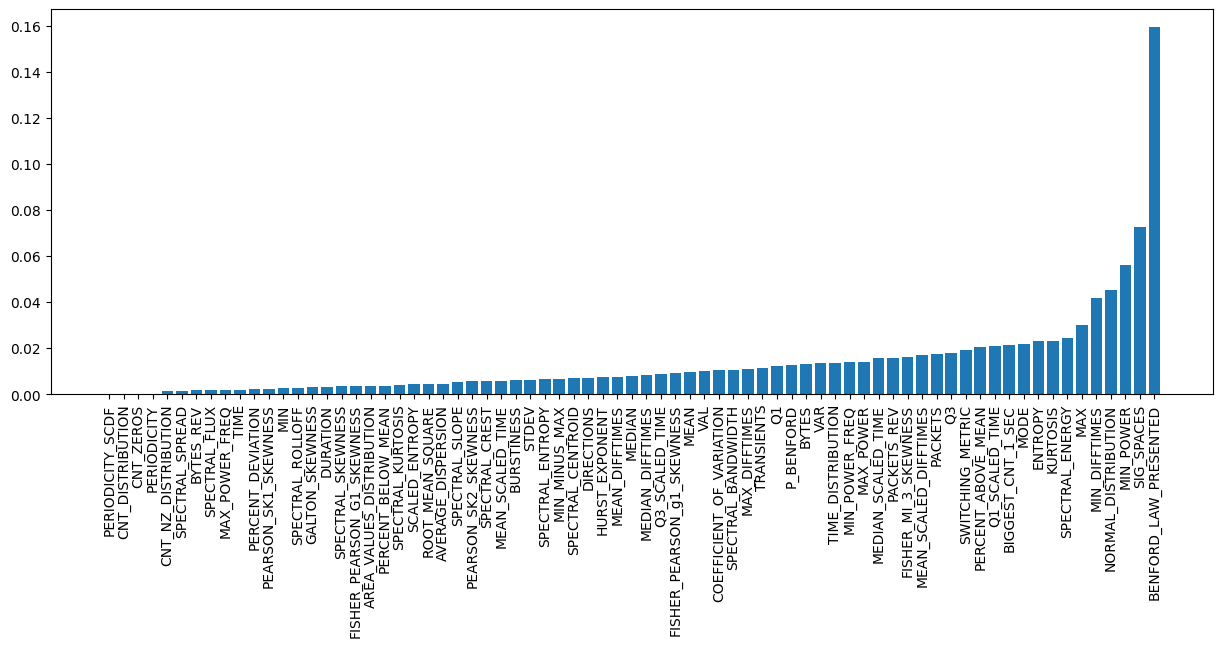

In [26]:
fig, ax = plt.subplots(figsize=(15,5))
ax.bar(feat_importances.keys(), feat_importances.values)
plt.xticks(rotation = 90)
plt.show()

In [27]:
feat_importances

PERIODICITY_SCDF         0.000000
CNT_DISTRIBUTION         0.000000
CNT_ZEROS                0.000000
PERIODICITY              0.000000
CNT_NZ_DISTRIBUTION      0.001379
                           ...   
MIN_DIFFTIMES            0.041557
NORMAL_DISTRIBUTION      0.045076
MIN_POWER                0.055901
SIG_SPACES               0.072713
BENFORD_LAW_PRESENTED    0.159241
Length: 73, dtype: float32

In [28]:
feat_importances.to_dict()

{'PERIODICITY_SCDF': 0.0,
 'CNT_DISTRIBUTION': 0.0,
 'CNT_ZEROS': 0.0,
 'PERIODICITY': 0.0,
 'CNT_NZ_DISTRIBUTION': 0.0013792547397315502,
 'SPECTRAL_SPREAD': 0.0014253180706873536,
 'BYTES_REV': 0.0016797082498669624,
 'SPECTRAL_FLUX': 0.0018038644921034575,
 'MAX_POWER_FREQ': 0.0018094961997121572,
 'TIME': 0.0019022905034944415,
 'PERCENT_DEVIATION': 0.0021687764674425125,
 'PEARSON_SK1_SKEWNESS': 0.0023476851638406515,
 'MIN': 0.002405154751613736,
 'SPECTRAL_ROLLOFF': 0.002748381346464157,
 'GALTON_SKEWNESS': 0.0028723839204758406,
 'DURATION': 0.002987845567986369,
 'SPECTRAL_SKEWNESS': 0.0033636046573519707,
 'FISHER_PEARSON_G1_SKEWNESS': 0.0033764552790671587,
 'AREA_VALUES_DISTRIBUTION': 0.003422845620661974,
 'PERCENT_BELOW_MEAN': 0.0034862773027271032,
 'SPECTRAL_KURTOSIS': 0.003958629444241524,
 'SCALED_ENTROPY': 0.004266649950295687,
 'ROOT_MEAN_SQUARE': 0.004281063564121723,
 'AVERAGE_DISPERSION': 0.004333981312811375,
 'SPECTRAL_SLOPE': 0.005308386869728565,
 'PEARSON_SK

# FEATURE SELECTION

In [29]:
def perform_val(selected_features, cycles = 5, best_hyperparams=None):
    if best_hyperparams is None:
        best_hyperparams = tunne_together_XGBoost_classification(df_features.sample(100000), selected_features, verbose=False)
    X_dos=df_features[selected_features]  # Features
    y_dos=df_features['LABEL_code']  # Labels

    best = 0
    best_model = None
    for i in range(0, cycles):    
        X_train, X_test, y_train, y_test = train_test_split(X_dos, y_dos, test_size=0.30, stratify=y_dos) # 70% training and 30% test
        model = XGBClassifier(
            n_estimators = int(best_hyperparams['n_estimators']), max_depth = int(best_hyperparams['max_depth']), gamma = best_hyperparams['gamma'],
            reg_alpha = int(best_hyperparams['reg_alpha']),min_child_weight=int(best_hyperparams['min_child_weight']),
            colsample_bytree=int(best_hyperparams['colsample_bytree']),
            )
        model.fit(X_train, y_train)                
        y_pred = model.predict(X_test)
        F1 = f1_score(y_test, y_pred, average='macro')
        if F1 > best:   
            best = F1
            best_model = model
            
    print(F1)

    X_validation=df_validation[selected_features]  # Features
    y_validation=df_validation['LABEL_code']  # Labels

    y_pred = best_model.predict(X_validation)
    
    report = classification_report(y_validation,y_pred)
    return report

In [30]:
import FEATURE_REDUCTED as FR
REPORTS = []


report = perform_val(FR.botnet_best_features)
REPORTS.append(report)
report = perform_val(FR.doh_best_features)
REPORTS.append(report)
report = perform_val(FR.dos_best_features)
REPORTS.append(report)
report = perform_val(FR.dns_malware_features)
REPORTS.append(report)
report = perform_val(FR.tor_features)
REPORTS.append(report)
report = perform_val(FR.vpn_features)
REPORTS.append(report)
report = perform_val(FR.all_best_features)
REPORTS.append(report)
report = perform_val(FR.combo_features)
REPORTS.append(report)
report = perform_val(FR.combo_2_features)
REPORTS.append(report)
report = perform_val(FR.crypto_features)
REPORTS.append(report)

100%|██████████| 100/100 [20:53<00:00, 12.54s/trial, best loss: -0.32184440327331004]
The best hyperparameters are :  

{'colsample_bytree': 0.6285737212560393, 'gamma': 3.129120620428081, 'max_depth': 8.0, 'min_child_weight': 7.0, 'n_estimators': 200.0, 'reg_alpha': 4.0, 'reg_lambda': 0.7108587006583378}
0.3631118092555944
100%|██████████| 100/100 [17:55<00:00, 10.76s/trial, best loss: -0.34452996235277106]
The best hyperparameters are :  

{'colsample_bytree': 0.6005867963702427, 'gamma': 2.100100663599303, 'max_depth': 8.0, 'min_child_weight': 2.0, 'n_estimators': 200.0, 'reg_alpha': 33.0, 'reg_lambda': 0.9879995912463131}
0.3162591274162677
100%|██████████| 100/100 [21:52<00:00, 13.13s/trial, best loss: -0.34816563603324424]
The best hyperparameters are :  

{'colsample_bytree': 0.5681118031866972, 'gamma': 1.9849003282845898, 'max_depth': 6.0, 'min_child_weight': 9.0, 'n_estimators': 200.0, 'reg_alpha': 5.0, 'reg_lambda': 0.08725596639958588}
0.3716872058637709
100%|██████████| 10

In [31]:
problem = "IDS_UNSW-multiclass"
with open("feature_reduction_results.csv", "a") as f:
    writer = csv.writer(f)
    for report, f_set in zip(REPORTS, FR.FEATURE_SETS):
        tmp = report.split("weighted avg")
        tmp_2 = tmp[0].split("macro avg")
        accuracy = tmp_2[0].split("accuracy")[1].split()[0]
        _ = tmp_2[1].split()
        m_precision = _[0]
        m_recall = _[1]
        m_f1 = _[2]
        _ = tmp[1].split()
        w_precision = _[0]
        w_recall = _[1]
        w_f1 = _[2]
        writer.writerow([problem, f_set, accuracy, m_precision, m_recall, m_f1, w_precision, w_recall, w_f1])